In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [3]:
#print cities
cities

['ancud',
 'acapulco',
 'georgetown',
 'hofn',
 'sorland',
 'geraldton',
 'hilo',
 'cape town',
 'college',
 'lerwick',
 'itarema',
 'bathsheba',
 'new norfolk',
 'hami',
 'qaanaaq',
 'albany',
 'mataura',
 'brae',
 'alice springs',
 'katangli',
 'kodiak',
 'viedma',
 'busselton',
 'ballangen',
 'esil',
 'gat',
 'cayenne',
 'mount gambier',
 'attawapiskat',
 'hobart',
 'bluff',
 'vila velha',
 'lavrentiya',
 'sandwick',
 'antalaha',
 'cidreira',
 'tuy hoa',
 'maridi',
 'nanortalik',
 'la concordia',
 'willowmore',
 'puerto ayora',
 'taolanaro',
 'todos santos',
 'ushuaia',
 'monrovia',
 'punta arenas',
 'esperance',
 'tabiauea',
 'norman wells',
 'amarante do maranhao',
 'amga',
 'hermanus',
 'uruguaiana',
 'port hardy',
 'east london',
 'kruisfontein',
 'palu',
 'hovd',
 'atuona',
 'matara',
 'leningradskiy',
 'rikitea',
 'port elizabeth',
 'nikolskoye',
 'barrow',
 'yaguajay',
 'dingle',
 'luena',
 'avarua',
 'vao',
 'nizhneyansk',
 'taoudenni',
 'ocampo',
 'vung tau',
 'talnakh',
 '

In [4]:
# create lists for new dataframe
#set url and 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
temp_max = []
counter = 0
skip_counter = 0
cloudiness =[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
windspd=[]
newcities = []

# Build query and show how many records are processing
# use try/except method to skip cities with no data
query_url = f"{url}appid={weather_api_key}&units={units}&q="
for city in cities:
    counter = counter+1
    response = requests.get(query_url + city).json()
    try:
        temp_max.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        windspd.append(response['wind']['speed'])
        newcities.append(city)
        print(f"Processing Record {counter}|{city}")
    except KeyError:
        skip_counter = skip_counter+1
        print(f"City not found. Skipping ({skip_counter}).")
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Processing Record 1|ancud
Processing Record 2|acapulco
Processing Record 3|georgetown
Processing Record 4|hofn
Processing Record 5|sorland
Processing Record 6|geraldton
Processing Record 7|hilo
Processing Record 8|cape town
Processing Record 9|college
Processing Record 10|lerwick
Processing Record 11|itarema
Processing Record 12|bathsheba
Processing Record 13|new norfolk
Processing Record 14|hami
Processing Record 15|qaanaaq
Processing Record 16|albany
Processing Record 17|mataura
Processing Record 18|brae
Processing Record 19|alice springs
Processing Record 20|katangli
Processing Record 21|kodiak
Processing Record 22|viedma
Processing Record 23|busselton
Processing Record 24|ballangen
Processing Record 25|esil
Processing Record 26|gat
Processing Record 27|cayenne
Processing Record 28|mount gambier
City not found. Skipping (1).
Processing Record 30|hobart
Processing Record 31|bluff
Processing Record 32|vila velha
Processing Record 33|lavrentiya
Processing Record 34|sandwick
Processing 

Processing Record 269|gold coast
Processing Record 270|san bartolome
Processing Record 271|yerbogachen
Processing Record 272|henties bay
Processing Record 273|comodoro rivadavia
Processing Record 274|saskylakh
Processing Record 275|ostrovnoy
Processing Record 276|chernaya kholunitsa
Processing Record 277|katobu
Processing Record 278|malaya vishera
Processing Record 279|mnogovershinnyy
Processing Record 280|pingliang
Processing Record 281|chokurdakh
Processing Record 282|abha
City not found. Skipping (22).
City not found. Skipping (23).
Processing Record 285|westport
Processing Record 286|owen sound
Processing Record 287|hoima
Processing Record 288|margate
Processing Record 289|vostok
City not found. Skipping (24).
Processing Record 291|yulara
Processing Record 292|pevek
Processing Record 293|mount isa
Processing Record 294|vaitape
Processing Record 295|escazu
Processing Record 296|anadyr
Processing Record 297|marawi
Processing Record 298|kaniama
Processing Record 299|segou
Processing R

Processing Record 532|brownsville
Processing Record 533|hailar
City not found. Skipping (40).
Processing Record 535|la cruz
Processing Record 536|kita
Processing Record 537|mitsamiouli
Processing Record 538|kudahuvadhoo
Processing Record 539|uch
Processing Record 540|lanzhou
Processing Record 541|mairana
Processing Record 542|burnie
Processing Record 543|chenghai
Processing Record 544|leh
City not found. Skipping (41).
Processing Record 546|kavaratti
Processing Record 547|talas
Processing Record 548|hanmer springs
Processing Record 549|xining
Processing Record 550|carutapera
Processing Record 551|bathurst
Processing Record 552|general roca
Processing Record 553|biltine
City not found. Skipping (42).
Processing Record 555|kloulklubed
Processing Record 556|puri
Processing Record 557|coahuayana
Processing Record 558|disna
Processing Record 559|ibra
Processing Record 560|pringsewu
Processing Record 561|phangnga
Processing Record 562|cuamba
Processing Record 563|madang
Processing Record 564

In [5]:
#populate a dataframe with the data pulled into the lists above
df = pd.DataFrame()
df["City"] = newcities
df["Cloudiness"] = cloudiness
df["Country"] = country
df["Date"] = date
df["Humidity"] = humidity
df["Lat"] = lat
df["Lng"]= lng
df["Max Temp"]=temp_max
df["Wind Speed"]=windspd
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ancud,6,CL,1580095293,87,-41.87,-73.82,50.00,2.24
1,acapulco,20,MX,1580094543,74,16.86,-99.89,80.60,8.05
2,georgetown,20,MY,1580094742,62,5.41,100.34,86.00,3.36
3,hofn,87,IS,1580094704,64,64.25,-15.21,39.74,23.09
4,sorland,100,NO,1580094796,97,67.67,12.69,28.49,28.74
...,...,...,...,...,...,...,...,...,...
564,homer,90,US,1580094807,46,59.64,-151.55,12.20,4.70
565,yarensk,100,RU,1580095384,98,62.17,49.09,-6.32,3.00
566,santa vitoria do palmar,65,BR,1580095384,93,-33.52,-53.37,70.61,5.26
567,vila franca do campo,40,PT,1580094785,88,37.72,-25.43,62.60,18.34


In [6]:
#export the data frame above to a csv
df.to_csv("fileOne.csv",index=False,header=True)

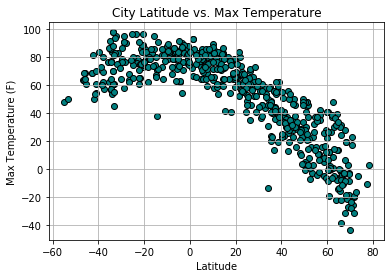

In [7]:
#Create scatter plots to analyze Latitude against multiple different weather related statistics
#print the plots to png files
plt.scatter(df["Lat"],df["Max Temp"],marker="o", facecolors = "teal",  edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("City Latitude vs. Max Temperature.png")
plt.show()

# the chart below plots max temperature in all cities analyzed against the latitude
# the chart seems to show (as expected) that the farther you get from the equator, the colder it gets

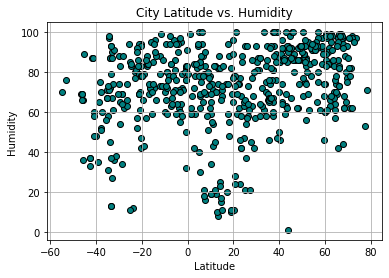

In [8]:
plt.scatter(df["Lat"],df["Humidity"],marker="o", facecolors = "teal", edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("City Latitude vs. Humidity.png")
plt.show()

# the chart below plots humidity in all cities analyzed against the latitude
# there are more data points with low humidity close to the equator than I had expected

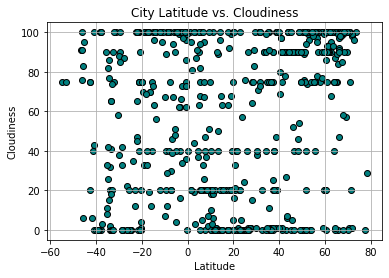

In [9]:
plt.scatter(df["Lat"],df["Cloudiness"],marker="o", facecolors = "teal", edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()

# the chart below plots cloudiness in all cities analyzed against the latitude
# there does not seem to be a lot lot of corellation between these data points


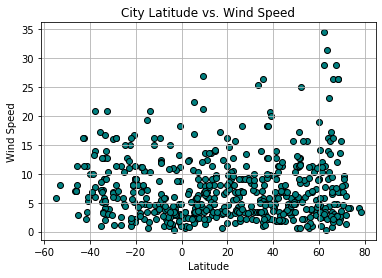

In [10]:
plt.scatter(df["Lat"],df["Wind Speed"],marker="o", facecolors = "teal", edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("City Latitude vs. Wind Speed.png")
plt.show()

# the chart below plots wind speed in all cities analyzed against the latitude
# wind speeds seem to be fairly consistent across cities independent of the distance to the equator

In [11]:
#create databases for the northern and southern hemispheres
df_north = df[df["Lat"]>=0]
df_south = df[df["Lat"]<=0]


The r-squared is: -0.8867171884222605


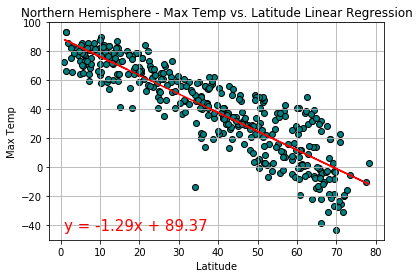

In [12]:
#run regression analyses based upon the weather types above based upon hemisphere
var = 'Max Temp'
x_values = df_north['Lat']
y_values = df_north[var]
y_print = y_values.min()
x_print = x_values.min()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue}")
plt.scatter(x_values,y_values,marker="o", facecolors = "teal",  edgecolors="black")
plt.title(f"Northern Hemisphere - {var} vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel(var)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_print,y_print),fontsize=15,color="red")
plt.grid()
plt.savefig("Northern Hemisphere - Max Temperature vs. Latitude.png")
plt.show()

# this chart looks at max temp vs latitude in the northern hemisphere
# the chart indicates that as you get farther from the equator the max temp gets colder and colder

The r-squared is: 0.3845242022156579


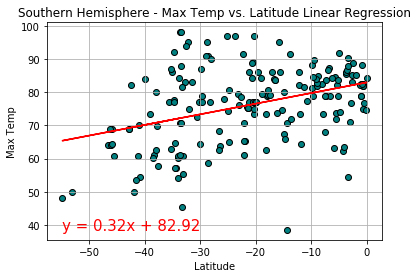

In [13]:
var = 'Max Temp'
x_values = df_south['Lat']
y_values = df_south[var]
y_print = y_values.min()
x_print = x_values.min()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue}")
plt.scatter(x_values,y_values,marker="o", facecolors = "teal",  edgecolors="black")
plt.title(f"Southern Hemisphere - {var} vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel(var)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_print,y_print),fontsize=15,color="red")
plt.grid()
plt.savefig("Southern Hemisphere - Max Temperature vs. Latitude.png")
plt.show()

# this chart looks at max temp vs latitude in the southern hemisphere
# the chart indicates that as you get closer to the equator the max temp gets warmer and warmer

The r-squared is: 0.37550538081979146


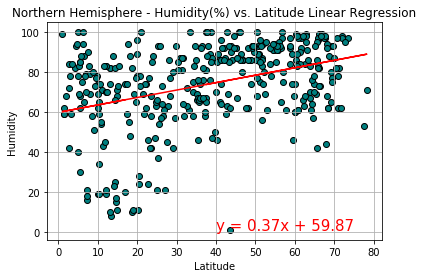

In [14]:
var = 'Humidity'
x_values = df_north['Lat']
y_values = df_north[var]
y_print = y_values.min()
x_print = x_values.max()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue}")
plt.scatter(x_values,y_values,marker="o", facecolors = "teal",  edgecolors="black")
plt.title(f"Northern Hemisphere - {var}(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel(var)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,y_print),fontsize=15,color="red")
plt.grid()
plt.savefig("Northern Hemisphere - Humidity vs. Latitude.png")
plt.show()

# this chart looks at humidity vs latitude in the northern hemisphere
# the chart indicates that as you get farther from the equator the humidity % increases

The r-squared is: 0.29315672265605464


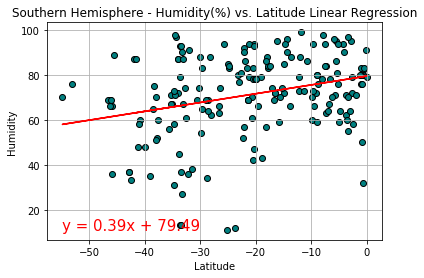

In [15]:
var = 'Humidity'
x_values = df_south['Lat']
y_values = df_south[var]
y_print = y_values.min()
x_print = x_values.min()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue}")
plt.scatter(x_values,y_values,marker="o", facecolors = "teal",  edgecolors="black")
plt.title(f"Southern Hemisphere - {var}(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel(var)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_print,y_print),fontsize=15,color="red")
plt.grid()
plt.savefig("Southern Hemisphere - Humidity vs. Latitude.png")
plt.show()

# this chart looks at humidity vs latitude in the southern hemisphere
# the chart indicates that as you get closer to the equator the humidity % increases

The r-squared is: 0.3748079720155415


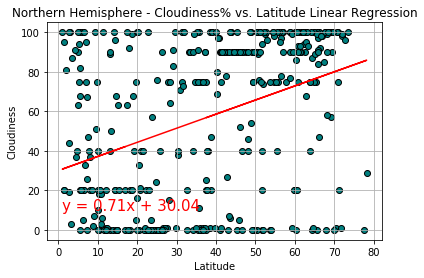

In [16]:
var = 'Cloudiness'
x_values = df_north['Lat']
y_values = df_north[var]
y_print = y_values.min()
x_print = x_values.min()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue}")
plt.scatter(x_values,y_values,marker="o", facecolors = "teal",  edgecolors="black")
plt.title(f"Northern Hemisphere - {var}% vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel(var)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_print,y_print+10),fontsize=15,color="red")
plt.grid()
plt.savefig("Northern Hemisphere - Cloudiness vs. Latitude.png")
plt.show()

# this chart looks at cloudiness vs latitude in the northern hemisphere
# the chart indicates that as you get farther from the equator the cloudiness % increases

The r-squared is: 0.2325049507766504


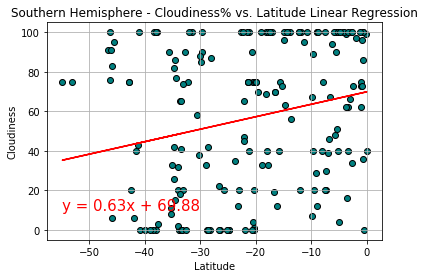

In [17]:
var = 'Cloudiness'
x_values = df_south['Lat']
y_values = df_south[var]
y_print = y_values.min()
x_print = x_values.min()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue}")
plt.scatter(x_values,y_values,marker="o", facecolors = "teal",  edgecolors="black")
plt.title(f"Southern Hemisphere - {var}% vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel(var)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_print,y_print+10),fontsize=15,color="red")
plt.grid()
plt.savefig("Southern Hemisphere - Cloudiness vs. Latitude.png")
plt.show()

# this chart looks at cloudiness vs latitude in the southern hemisphere
# the chart indicates that as you get closer to the equator the cloudiness % increases

The r-squared is: 0.10955320229789059


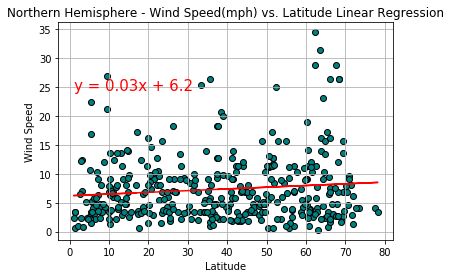

In [18]:
var = 'Wind Speed'
x_values = df_north['Lat']
y_values = df_north[var]
y_print = y_values.max()
x_print = x_values.min()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue}")
plt.scatter(x_values,y_values,marker="o", facecolors = "teal",  edgecolors="black")
plt.title(f"Northern Hemisphere - {var}(mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel(var)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_print,y_print-10),fontsize=15,color="red")
plt.grid()
plt.savefig("Northern Hemisphere - Wind Speed vs. Latitude.png")
plt.show()

# this chart looks at wind speed vs latitude in the northern hemisphere
# the chart indicates that wind speed is not highly correlated to latitude

The r-squared is: -0.23830328173813767


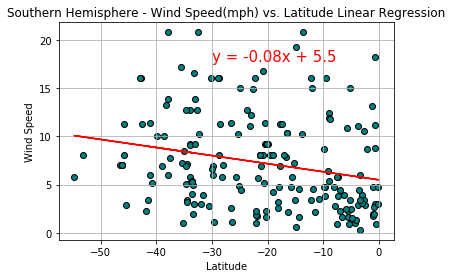

In [19]:
var = 'Wind Speed'
x_values = df_south['Lat']
y_values = df_south[var]
y_print = y_values.max()
x_print = x_values.max()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue}")
plt.scatter(x_values,y_values,marker="o", facecolors = "teal",  edgecolors="black")
plt.title(f"Southern Hemisphere - {var}(mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel(var)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_print-30,y_print-3),fontsize=15,color="red")
plt.grid()
plt.savefig("Southern Hemisphere - Wind Speed vs. Latitude.png")
plt.show()

# this chart looks at wind speed vs latitude in the southern hemisphere
# the chart indicates that wind speed is not highly correlated to latitude